In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import itertools

In [49]:
df= pd.read_csv(r"D:\data science\maktab\jadi\heart.csv")
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


<font size= "5">correlation</font>

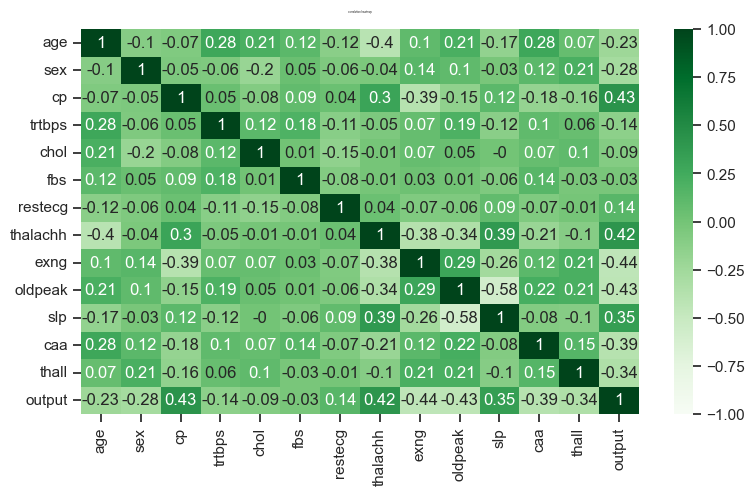

In [50]:
# first we have to know correlation between features to avoid multicollinearity
f= plt.figure(figsize= (9, 5))
heatmap= sns.heatmap(df.corr().round(2), vmin= -1, vmax= 1, annot=True, cmap= 'Greens')
heatmap.set_title('correlation heatmap', fontdict={'fontsize': 2}, pad=12)
plt.show()

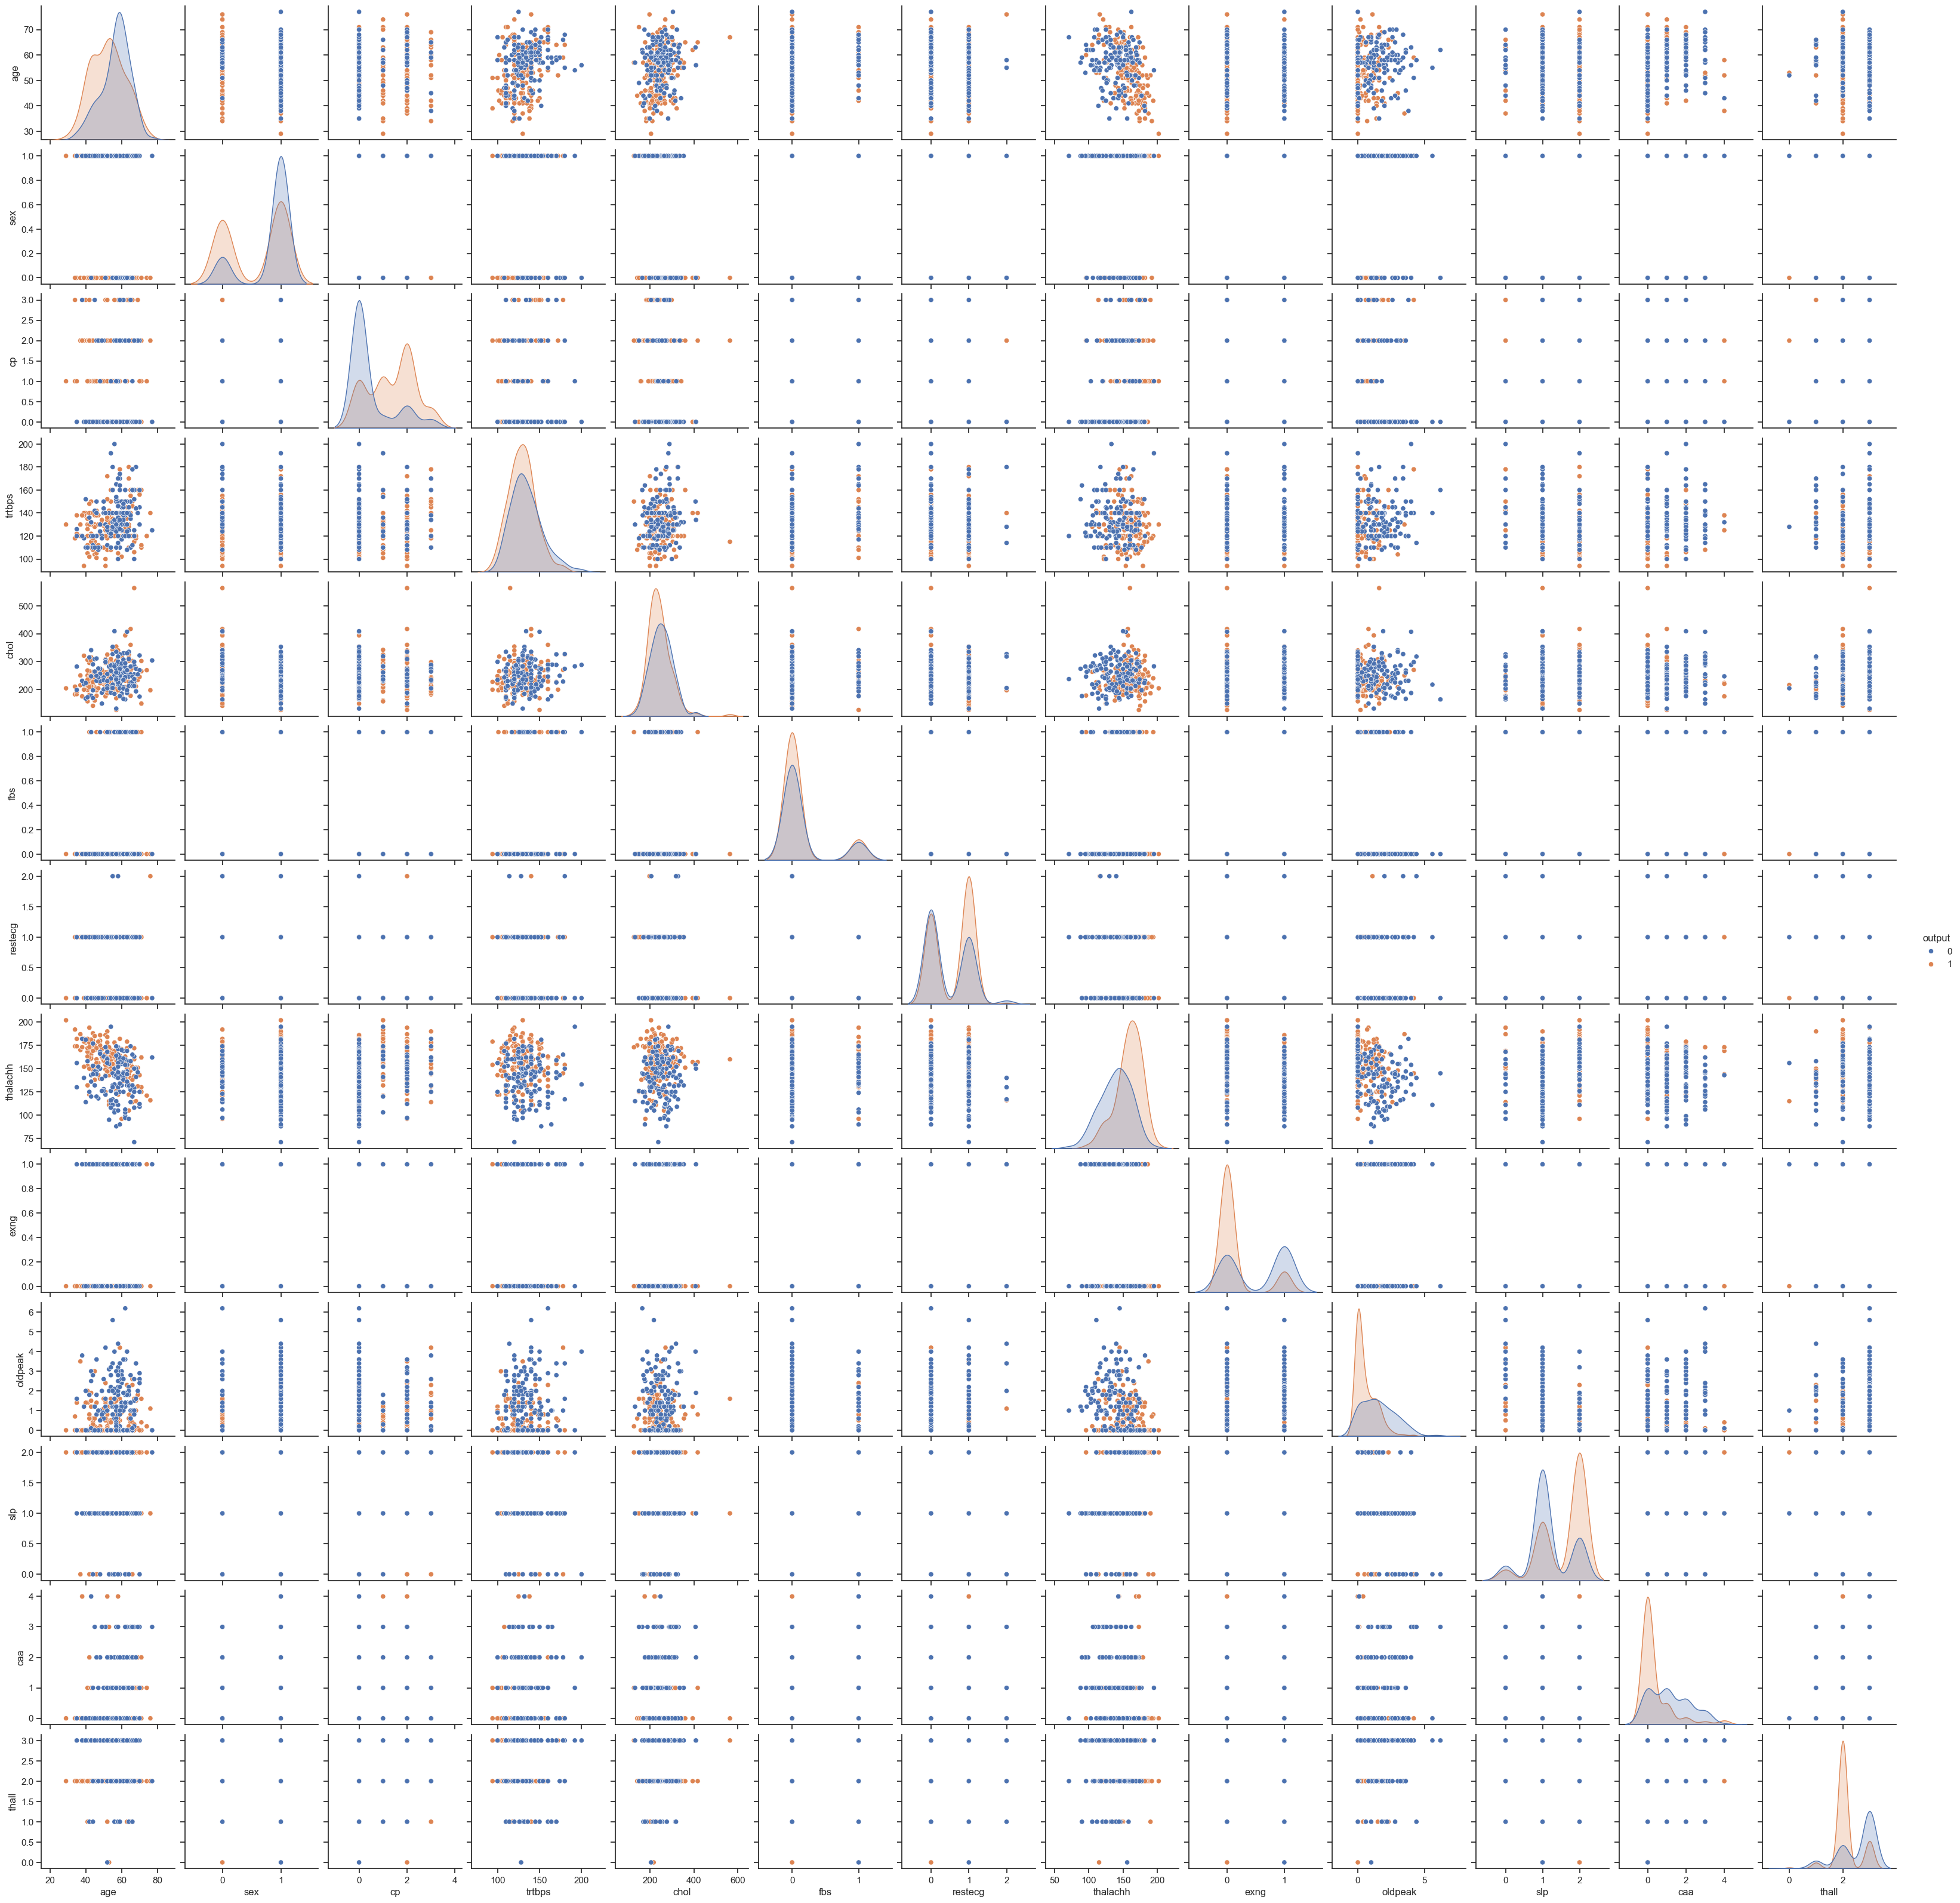

In [51]:
sns.set(style= 'ticks')
sns.pairplot(df, hue= 'output')
plt.show()

<font size= "5">handle noisy data</font>

In [52]:
# If the minimum and maximum values are unusual, we need to handle them.
# our data must be numeric so we have to check their datatype
for i in df.columns:
    print("minimum is:", df[i].min(), "maximum is:", df[i].max())
    print("type of data is:", df[i].dtype)

minimum is: 29 maximum is: 77
type of data is: int64
minimum is: 0 maximum is: 1
type of data is: int64
minimum is: 0 maximum is: 3
type of data is: int64
minimum is: 94 maximum is: 200
type of data is: int64
minimum is: 126 maximum is: 564
type of data is: int64
minimum is: 0 maximum is: 1
type of data is: int64
minimum is: 0 maximum is: 2
type of data is: int64
minimum is: 71 maximum is: 202
type of data is: int64
minimum is: 0 maximum is: 1
type of data is: int64
minimum is: 0.0 maximum is: 6.2
type of data is: float64
minimum is: 0 maximum is: 2
type of data is: int64
minimum is: 0 maximum is: 4
type of data is: int64
minimum is: 0 maximum is: 3
type of data is: int64
minimum is: 0 maximum is: 1
type of data is: int64


<font size= "5">handle outliers</font>

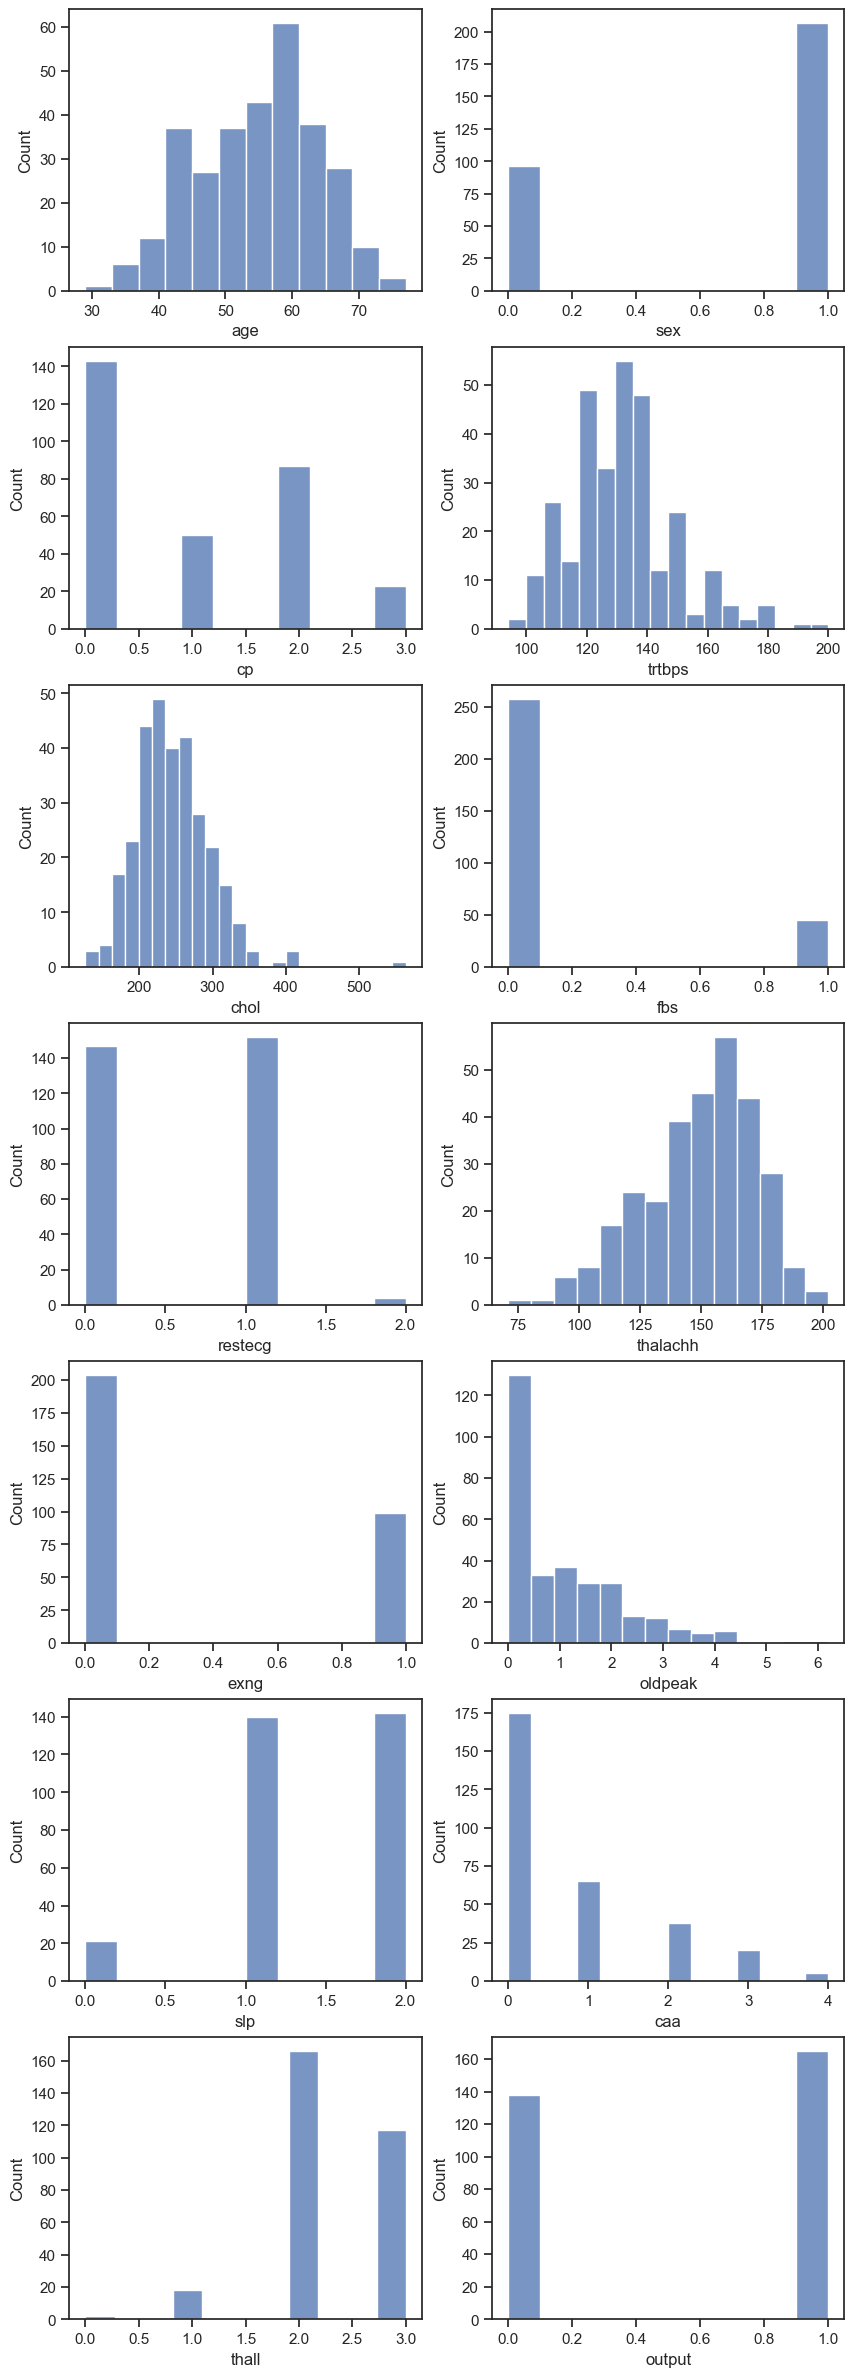

In [53]:
# we plot histplot for each feature to see outliers
fig, axes= plt.subplots(7, 2, figsize= (10, 30))
axes= axes.ravel()
cols = list(df.columns)
for col, ax in zip(cols, axes):
    sns.histplot(data= df[col], ax= ax)

In [54]:
# IQR use to detect outliers
cols = df[["age", "trtbps", "chol", "thalachh", "oldpeak"]]
for index, i in enumerate(cols):
    sorted_data= df[i].sort_values()
    Q1= np.percentile(sorted_data, 25)
    Q3= np.percentile(sorted_data, 75)
    IQR= Q3 - Q1
    low_lim= Q1 - 1.5 * IQR
    up_lim= Q3 + 1.5 * IQR
    print(low_lim, up_lim)
    count= 0
    for index1, i1 in enumerate(df[i]):
        if i1 > up_lim or i1 < low_lim:
            # Later, it will be filled using an algorithm.
            df.loc[index1, i]= np.nan
            count += 1
    print(count)

27.25 81.25
0
90.0 170.0
9
115.75 369.75
5
84.75 214.75
1
-2.4000000000000004 4.0
5


<font size= "5">handle missing value</font>

In [55]:
# How many missing values do we have
df.isna().sum()

age         0
sex         0
cp          0
trtbps      9
chol        5
fbs         0
restecg     0
thalachh    1
exng        0
oldpeak     5
slp         0
caa         0
thall       0
output      0
dtype: int64

In [56]:
# Impute discrete data using mode and impute continuous data using random forest regression.
df['trtbps']= df['trtbps'].fillna(df['trtbps'].mode()[0])
df['chol']= df['chol'].fillna(df['chol'].mode()[0])
df['thalachh']= df['thalachh'].fillna(df['thalachh'].mode()[0])

emp= IterativeImputer(estimator= RandomForestRegressor())
df['oldpeak']= emp.fit_transform(df['oldpeak'].to_numpy().reshape(-1, 1))

<font size= "5">scaling</font>

In [57]:
# Splitting the Data into Training and Testing Sets
train, test= train_test_split(df, test_size= 0.2, shuffle= True, random_state= 42)

# scaling train and test using minmaxscaler
scaler= MinMaxScaler()
train_set= scaler.fit_transform(train)
test_set= scaler.transform(test)

# seperate features and target
x_train= train_set[:, :13]
y_train= train_set[:, 13]
x_test= test_set[:, :13]
y_test= test_set[:, 13]

<font size= "5">modele selection</font>

In [58]:
# use 4 model of classification to predict and evalute models
# k-nearest-neighbor(knn)
k_values= 30
knn_scores= []

for i in range(1, k_values):
    knn= KNeighborsClassifier(n_neighbors= i)
    model= knn.fit(x_train, y_train)
    y_pred_knn= model.predict(x_test)
    knn_scores.append(accuracy_score(y_test, y_pred_knn))

knn_scores= np.array(knn_scores) 
print(f'The best score was obtained with k= {knn_scores.argmax()+1} and a values of {knn_scores.max()}')

The best score was obtained with k= 5 and a values of 0.8360655737704918


In [59]:
# decision tree 
number_of_result= 30
tree_scores= []

for i in range(1, number_of_result):
    dtree= DecisionTreeClassifier()
    dtree.fit(x_train, y_train)
    y_pred_tree= dtree.predict(x_test)
    tree_scores.append(accuracy_score(y_test, y_pred_tree))

tree_scores= np.array(tree_scores) 
print(f'The best score was obtained with {tree_scores.argmax()+1} and a values of {tree_scores.max()}')

The best score was obtained with 22 and a values of 0.819672131147541


In [60]:
# logistic regression
logr= LogisticRegression()
logr.fit(x_train, y_train)
y_pred_log= logr.predict(x_test)
log_score= accuracy_score(y_test, y_pred_log)
print('the score is:', log_score)

the score is: 0.8688524590163934


In [61]:
# support vector classifier
kernels= ['rbf', 'linear', 'sigmoid', 'poly']
sup_scores= []
for i in kernels:
    supv= SVC(kernel= i)
    supv.fit(x_train, y_train)
    y_pred_svc= supv.predict(x_test)
    sup_scores.append([i, accuracy_score(y_test, y_pred_svc)])
sup_scores= np.array(sup_scores) 
print(f'The best score was obtained with {sup_scores[sup_scores[:, 1].argmax(), 0]} and a values of {sup_scores[sup_scores[:, 1].argmax(), 1]}')

The best score was obtained with linear and a values of 0.8688524590163934


<font size= "5">Evaluation</font>

In [62]:
# Logistic regression and support vector classification (SVC) perform better than others. We use one of them (logestic) to show its details.

              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86        29
         1.0       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

confusion_matrix:
 [[25  4]
 [ 4 28]]


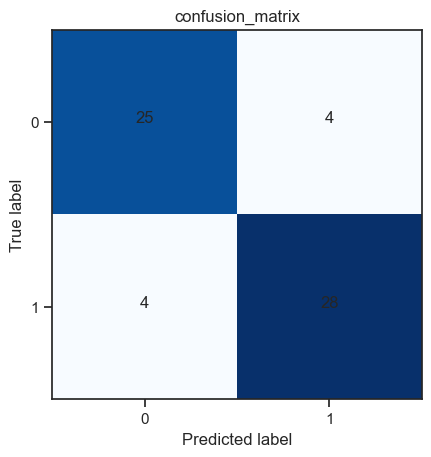

In [63]:
# confusion_matrix
cm= confusion_matrix(y_test, y_pred_log, labels=[0, 1])
np.set_printoptions(precision=2)
print(classification_report(y_test, y_pred_log))
print('confusion_matrix:\n', cm)

plt.imshow(cm, cmap= plt.cm.Blues)
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j]),
    horizontalalignment="center")
plt.title('confusion_matrix')
tick_marks = np.arange(len([0, 1]))
plt.xticks(tick_marks, [0, 1])
plt.yticks(tick_marks, [0, 1])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()